### TIME SERIES ANALYSIS: AIR PASSENGERS PREDICTION

The following project is about performing time series analysis on data in order to predict the number of passengers for upcoming months.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [2]:
dataset = pd.read_csv('AirPassengers.csv')
#Parse strings to datetime type
dataset['Month'] = pd.to_datetime(dataset["Month"], infer_datetime_format = True)
indexedDataset = dataset.set_index(["Month"])

In [3]:
from datetime import datetime
indexedDataset.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Figure size 2000x1000 with 0 Axes>

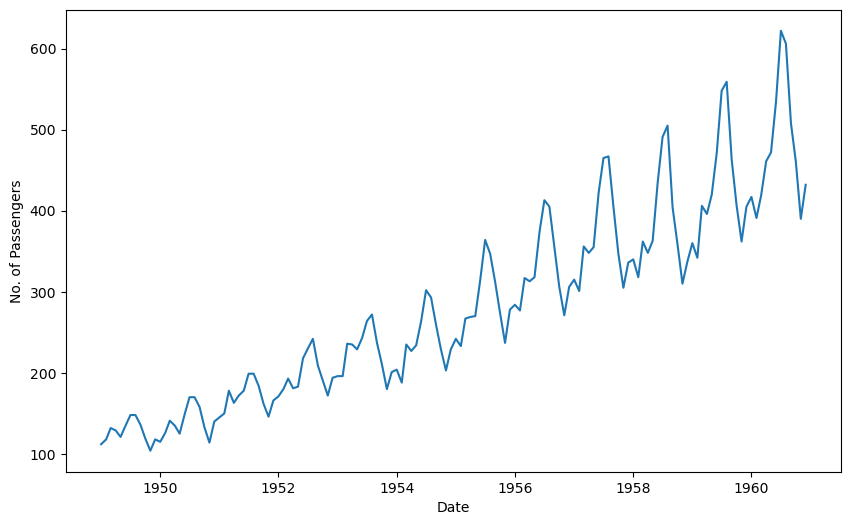

<Figure size 2000x1000 with 0 Axes>

In [4]:
#plot graph
plt.xlabel("Date")
plt.ylabel("No. of Passengers")
plt.plot(indexedDataset)
plt.figure(figsize=(20,10))

The data is non-stationary since the mean value of passengers is not constant and it is increasing in nature.

We will perform the following 2 tests to check for stationarity: 
1. Rolling Statistics
2. Dickey Fuller Test

In [5]:
#Determining rolling statistics
rolmean = indexedDataset.rolling(window=12).mean()
rolstd = indexedDataset.rolling(window=12).std()
print(rolmean, rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


We have used window=12 implying a window of 12 months.

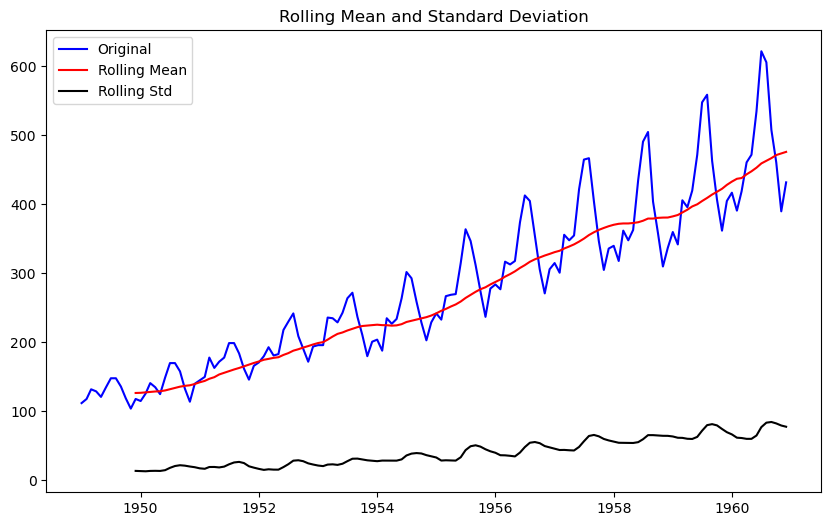

<Figure size 3000x1000 with 0 Axes>

In [6]:
from numpy.core.shape_base import block
#plotting Rolling statistics
orig = plt.plot(indexedDataset, color='blue',label='Original')
mean = plt.plot(rolmean,color='red',label='Rolling Mean')
std = plt.plot(rolstd,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.figure(figsize=(30,10))
plt.show(block=False)

One can observe from the rolling statistics test that both 'Mean' & 'Std Deviation' are increasing in nature and not constant which implies the data is not stationary. 

**Dickey-Fuller Test:**

The following two null and alternate hypotheses are involved:

1. **H0**: The time series is regarded as non-stationary. In simple words, we can say that it follows a time-dependent structure to some extent and doesn’t follow the constant variance over a period of time.

2. **HA**: The time series is regarded as stationary.

In [7]:
#Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(indexedDataset['#Passengers'],autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','No. of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value(%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                0.815369
p-value                       0.991880
#Lags Used                   13.000000
No. of Observations Used    130.000000
Critical Value(1%)           -3.481682
Critical Value(5%)           -2.884042
Critical Value(10%)          -2.578770
dtype: float64


We observe that the p-value is not less than 0.05 and hence we can not reject the null hypothesis. We can say that data is not stationary.

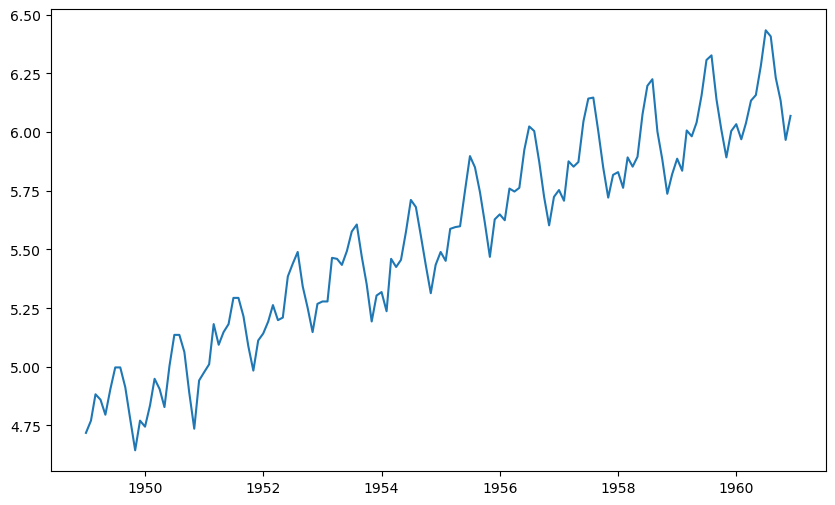

In [8]:
#Estimating Trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

The trend remains the same as that without the log transformation. But the values on Y-axis have changed. 

Using Moving average:

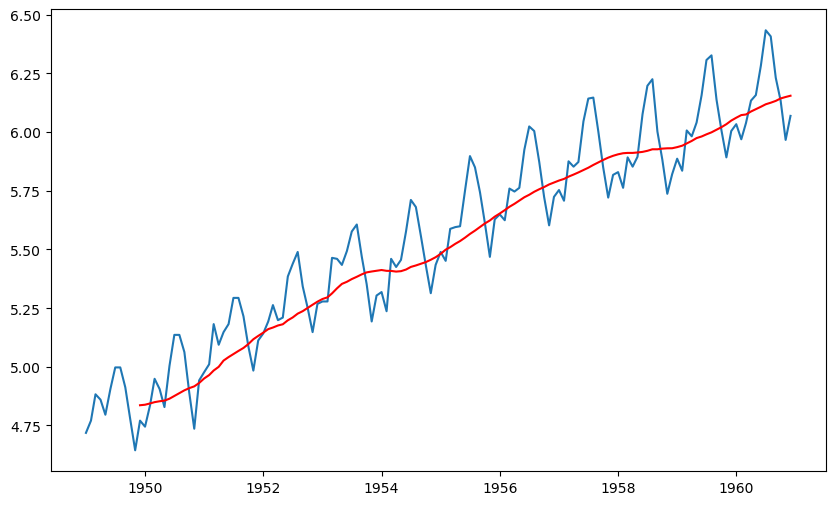

In [9]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

In order to introduce stationarity into the data, we will take difference between moving average and actual no. of passengers(log transformed). Now we can also take square of data or nth root of data instead of logScale but all of this depends upon the data we are using. This approach can also be understood as removing the trends from the data. This technique is called Detrend by Model fitting.

We can also do Detrend by model fitting by using a linear regression model and taking the final value as residuals(Yactual-Ypred).

We can also detrend the data by taking difference between actual consecutive values. The difference can be between gap of 2 or 3 or 4, etc consecutive observations. (Y2-Y1),(Y3-Y1),(Y4-Y1)

In [10]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10) 

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [11]:
def test_stationarity(timeseries):
  #Determining Rolling Statistics
  movingAverage = timeseries.rolling(window=12).mean()
  movingSTD = timeseries.rolling(window=12).std()

  #Plotting Rolling Statistics
  orig = plt.plot(timeseries, color='blue',label='Original')
  mean = plt.plot(movingAverage,color='red',label='Rolling Mean')
  std = plt.plot(movingSTD,color='black',label='Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean and Standard Deviation')
  plt.figure(figsize=(30,10))
  plt.show(block=False)

  #Dickey-Fuller Test
  from statsmodels.tsa.stattools import adfuller
  print('Results of Dickey-Fuller Test:')
  dftest = adfuller(timeseries['#Passengers'],autolag='AIC')
  dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','No. of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value(%s)'%key] = value
  print(dfoutput)

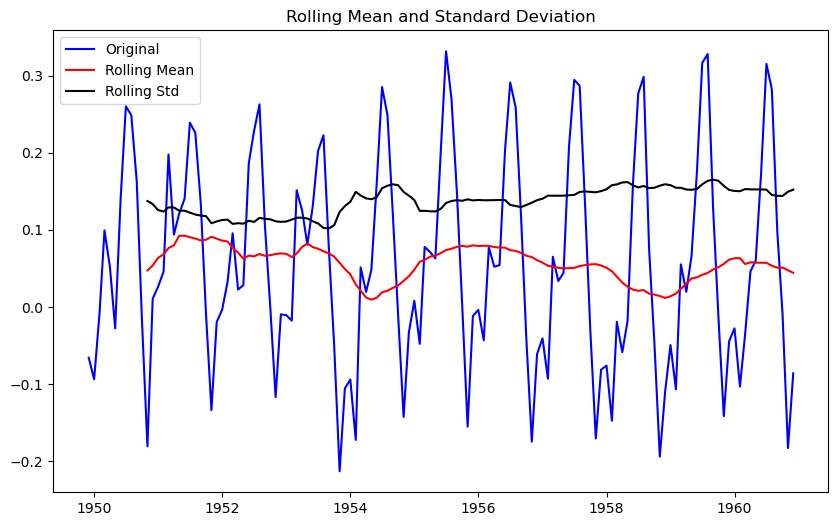

<Figure size 3000x1000 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic               -3.162908
p-value                       0.022235
#Lags Used                   13.000000
No. of Observations Used    119.000000
Critical Value(1%)           -3.486535
Critical Value(5%)           -2.886151
Critical Value(10%)          -2.579896
dtype: float64


In [12]:
test_stationarity(datasetLogScaleMinusMovingAverage)

1. From rolling statistics we can observe that there is no trend now in mean and standard deviation.

2. Also from Dickey Fuller test, we can observe that p-value <0.05. Hence we can reject the null hypothesis.

Using Exponential weighted moving average:



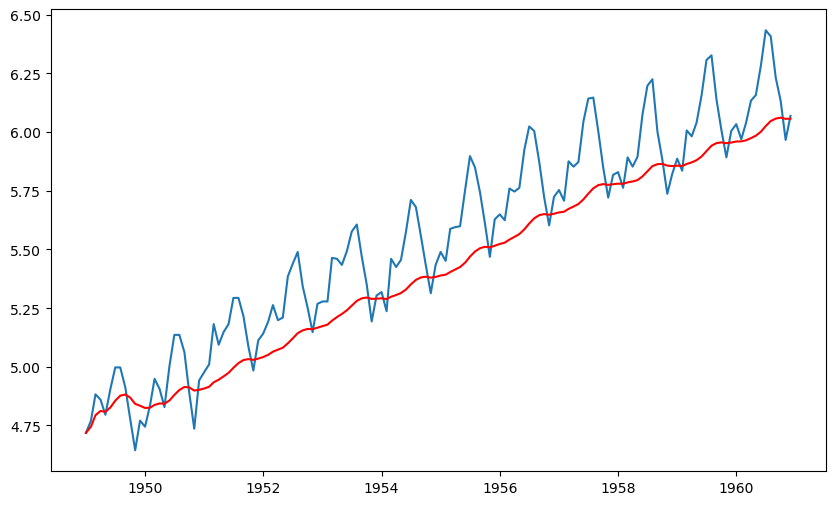

In [13]:
  exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12,min_periods=0, adjust=True).mean()
  plt.plot(indexedDataset_logScale)
  plt.plot(exponentialDecayWeightedAverage, color ="red")

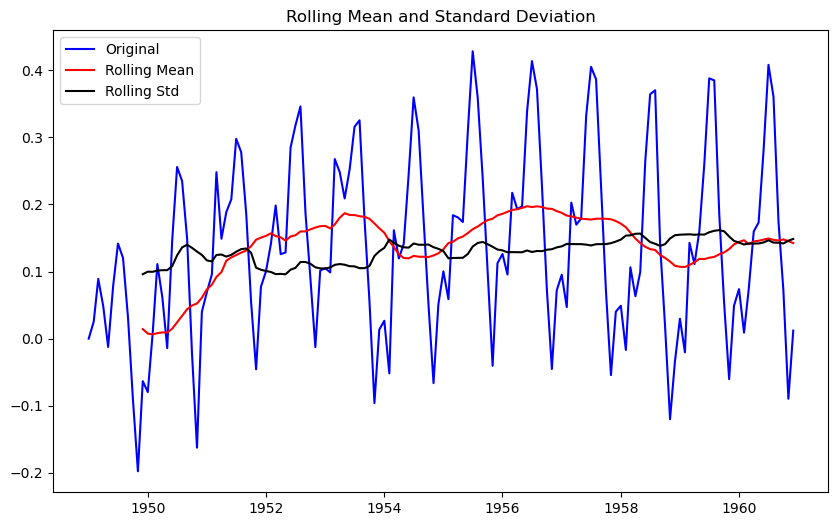

<Figure size 3000x1000 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic               -3.601262
p-value                       0.005737
#Lags Used                   13.000000
No. of Observations Used    130.000000
Critical Value(1%)           -3.481682
Critical Value(5%)           -2.884042
Critical Value(10%)          -2.578770
dtype: float64


In [14]:
datasetLogScaleMinusMovingExpoentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExpoentialDecayAverage)

1. From rolling statistics we can observe that there is no trend  in mean and standard deviation.

2. Also from Dickey Fuller test, we can observe that p-value <0.05. Hence we can reject the null hypothesis.

Now, we will detrend by differencing by taking lag of 1 which means we will take difference of the consecutive values of data.

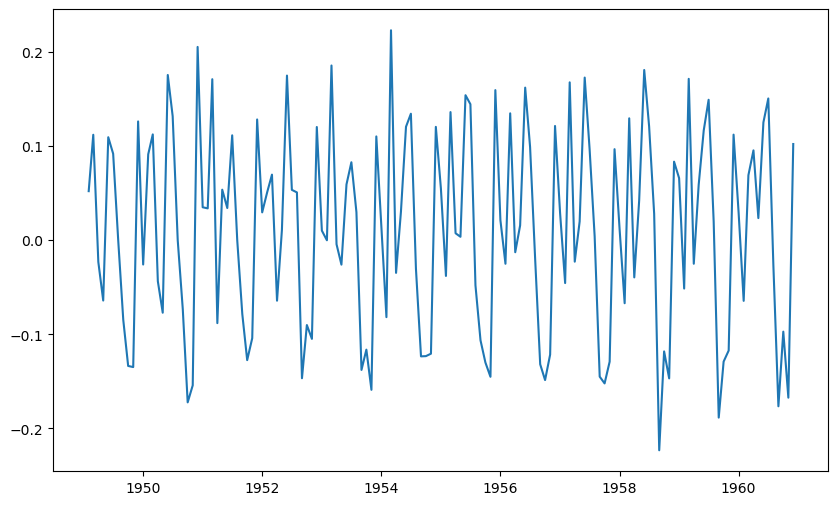

In [15]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

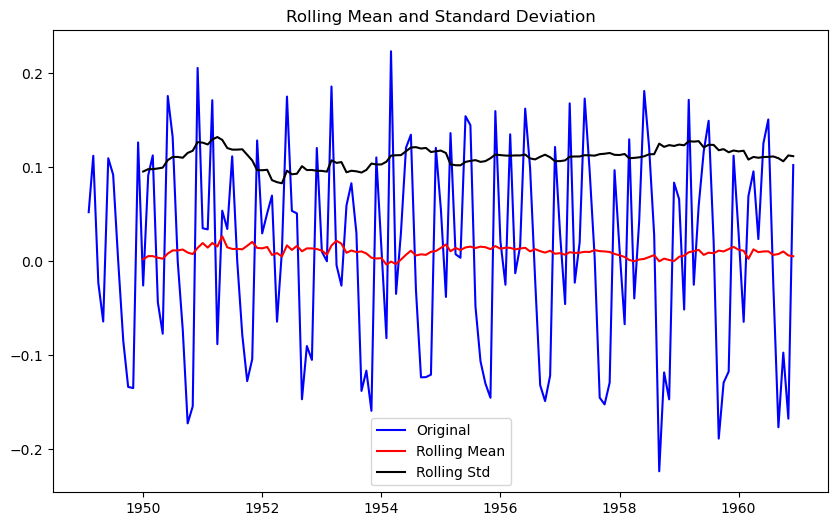

<Figure size 3000x1000 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic               -2.717131
p-value                       0.071121
#Lags Used                   14.000000
No. of Observations Used    128.000000
Critical Value(1%)           -3.482501
Critical Value(5%)           -2.884398
Critical Value(10%)          -2.578960
dtype: float64


In [16]:
datasetLogDiffShifting.dropna(inplace = True)
test_stationarity(datasetLogDiffShifting)

1. From rolling statistics we can observe that there is no trend  in mean and standard deviation.

2. Also from Dickey Fuller test, we can observe that p-value  is appx 0.05. Hence we can reject the null hypothesis.

## Decomposition of Time Series:
We will decompose the time series into 4 parts.
In time series analysis for forecasting new values, it is very important to know about the past data. More formally, we can say it is very important to know about the patterns which are followed by the values with time. There can be many reasons which cause our forecasted values to fall in the wrong direction. Basically, a time series consists of four components. Variation of those components causes the change in the pattern of the time series. These components are:

1. Level: It is the main value that goes on average with time.
2. Trend: The trend is the value that causes increasing or decreasing patterns in a time series.
3. Seasonality: This is a cyclic event that occurs in time series for a short time and causes the increasing or decreasing patterns for a short time in a time series.
4. Noise: These are the random variations in the time series.
The combination of those components with time causes the formation of a time series. Most time series consists of the level and noise/residual and the trend or seasonality are the optional values. They may take part or they may not. 

The combination of the components in time series can be of two types:

1. Additive
2. Multiplicative

I. **Additive time series**

if the components of the time series are added together to make the time series. Then the time series is called the additive time series. By visualization, we can say the time series is additive if the increasing or decreasing pattern of the time series is similar throughout the series. The mathematical function of any additive time series can be represented by:

**y(t) = level + Trend + seasonality + noise**

II. **Multiplicative time series**

If the components of the time series are multiplicative together, then the time series is called the multiplicative time series. By visualization, if the time series is having exponential growth or decrement with time then the time series can be considered as the multiplicative time series. The mathematical function of the Multiplicative time series can be represented as.

**y(t) = Level * Trend * seasonality * Noise**

Residuals = Actual-Predicted

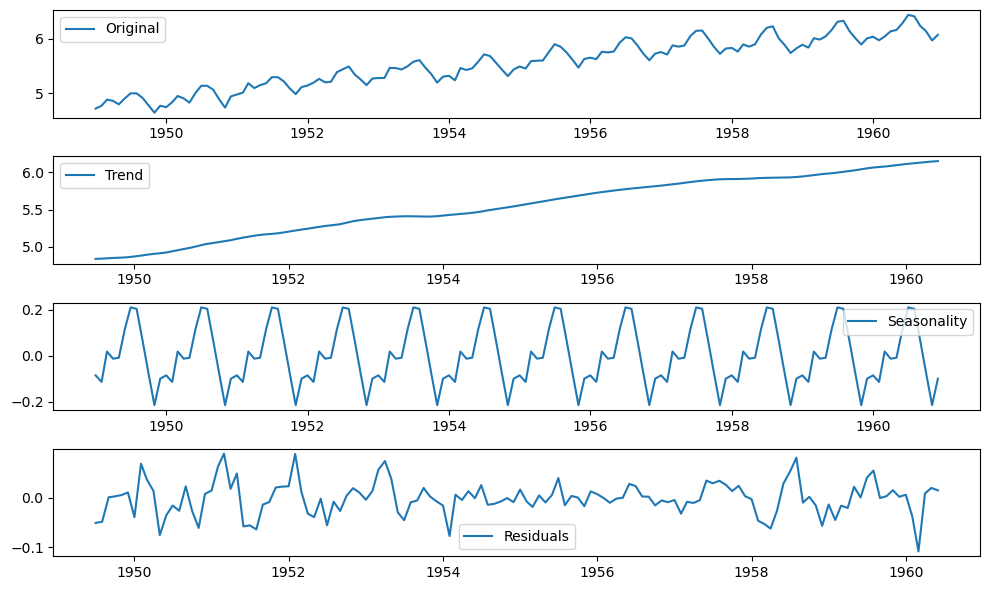

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label="Original")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label="Trend")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label="Seasonality")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label="Residuals")
plt.legend(loc='best')
plt.tight_layout()

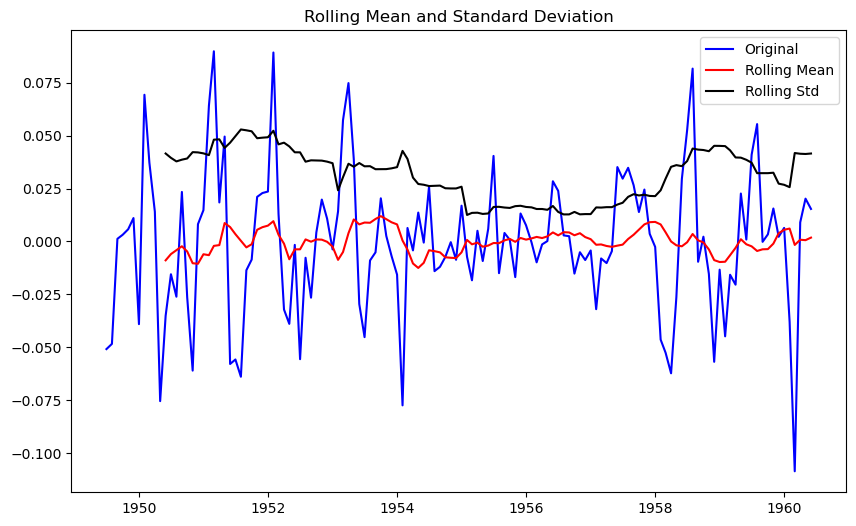

<Figure size 3000x1000 with 0 Axes>

Results of Dickey-Fuller Test:


KeyError: '#Passengers'

In [18]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

### ARIMA MODEL:
An ARIMA model can be understood by outlining each of its components as follows:

1. Autoregression (AR): refers to a model that shows a changing variable that regresses on its own lagged, or prior, values.
2. Integrated (I): represents the differencing of raw observations to allow for the time series to become stationary (i.e., data values are replaced by the difference between the data values and the previous values).
3. Moving average (MA):  incorporates the dependency between an observation and a residual error from a moving average model applied to lagged observations.

Auto-Regressive Models:
In a multiple regression model, we forecast the variable of interest using a linear combination of predictors. In an autoregression model, we forecast the variable of interest using a linear combination of past values of the variable. The term autoregression indicates that it is a regression of the variable against itself.

Thus, an autoregressive model of order p can be written as
yt=c+ϕ1yt−1+ϕ2yt−2+⋯+ϕpyt−p+εt,where  
εt is white noise. 
This is like a multiple regression but with lagged values of 
yt as predictors. We refer to this as an AR(p) model, an autoregressive model of order p.
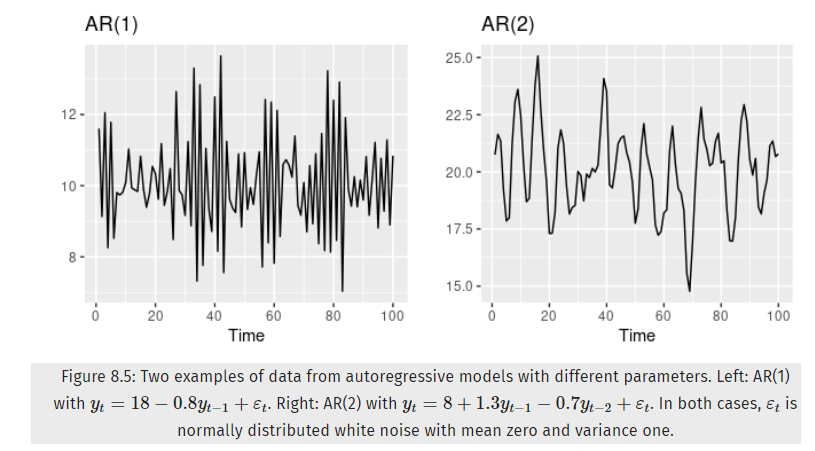

### What are the differences between autoregressive and moving average models?


ARIMA combines autoregressive features with those of moving averages. An AR(1) autoregressive process, for instance, is one in which the current value is based on the immediately preceding value, while an AR(2) process is one in which the current value is based on the previous two values. A moving average is a calculation used to analyze data points by creating a series of averages of different subsets of the full data set in order to smooth out the influence of outliers. As a result of this combination of techniques, ARIMA models can take into account trends, cycles, seasonality, and other non-static types of data when making forecasts.



### ARIMA Parameters

Each component in ARIMA functions as a parameter with a standard notation. For ARIMA models, a standard notation would be ARIMA with p, d, and q, where integer values substitute for the parameters to indicate the type of ARIMA model used. The parameters can be defined as:

1. p: the number of lag observations in the model; also known as the lag order.
2. d: the number of times that the raw observations are differenced; also known as the degree of differencing.
3. q: the size of the moving average window; also known as the order of the moving average.

### ACF & PACF Plots
1. ACF plot is a bar chart of coefficients of correlation between a time series and it lagged values. Simply stated: ACF explains how the present value of a given time series is correlated with the past (1-unit past, 2-unit past, …, n-unit past) values. In the ACF plot, the y-axis expresses the correlation coefficient whereas the x-axis mentions the number of lags. Assume that, y(t-1), y(t), y(t-1),….y(t-n) are values of a time series at time t, t-1,…,t-n, then the lag-1 value is the correlation coefficient between y(t) and y(t-1), lag-2 is the correlation coefficient between y(t) and y(t-2) and so on.

2. PACF is the partial autocorrelation function that explains the partial correlation between the series and lags itself. In simple terms, PACF can be explained using a linear regression where we predict y(t) from y(t-1), y(t-2), and y(t-3) [2]. In PACF, we correlate the “parts” of y(t) and y(t-3) that are not predicted by y(t-1) and y(t-2).
https://youtu.be/DeORzP0go5I

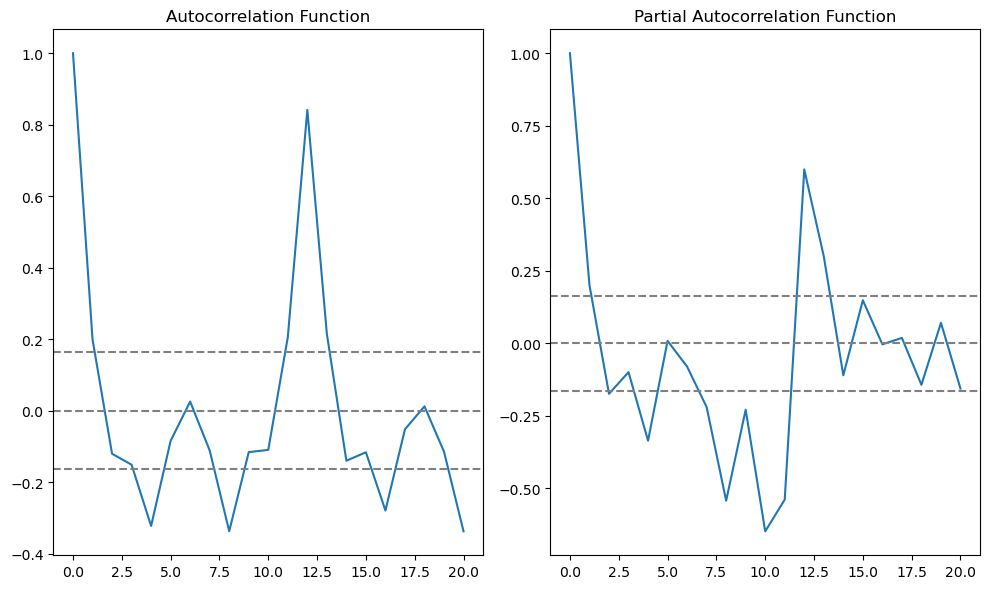

In [22]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

p(AR) value is obtained from pacf curve when the pacf value first drops to 0.

q(MA) value is obtained from acf curve when the acf value first drops to 0.

p = 2

q = 2

### AR Model: 

We will first of fit only AR model. Ths can be done by putting value of q=0 in ARIMA model parameters.

C:\Users\5120a\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\5120a\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\5120a\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Plotting AR Model


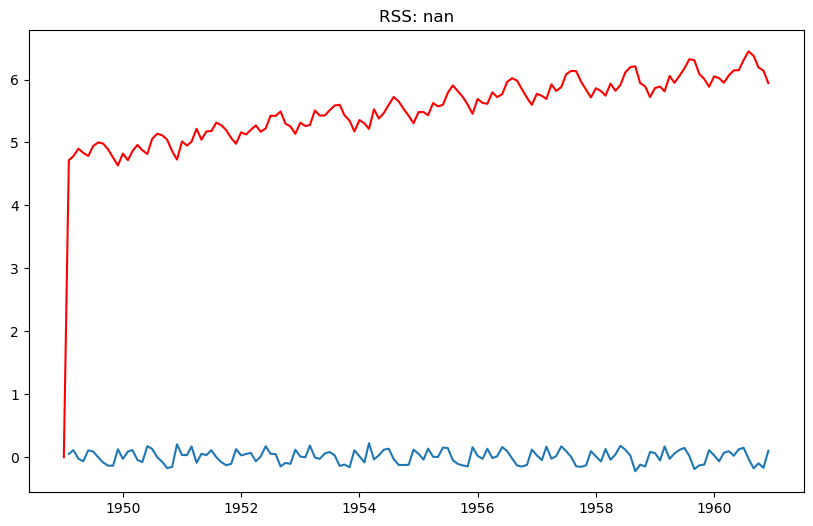

In [25]:
from statsmodels.tsa.arima.model import ARIMA
#AR model 
model = ARIMA(indexedDataset_logScale,order=(2,1,0))
results_AR = model.fit()
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting['#Passengers'])**2))
print('Plotting AR Model')

### MA Model: 

We will now fit only MA model. Ths can be done by putting value of p=0 in ARIMA model parameters.

C:\Users\5120a\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\5120a\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\5120a\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Plotting MA Model


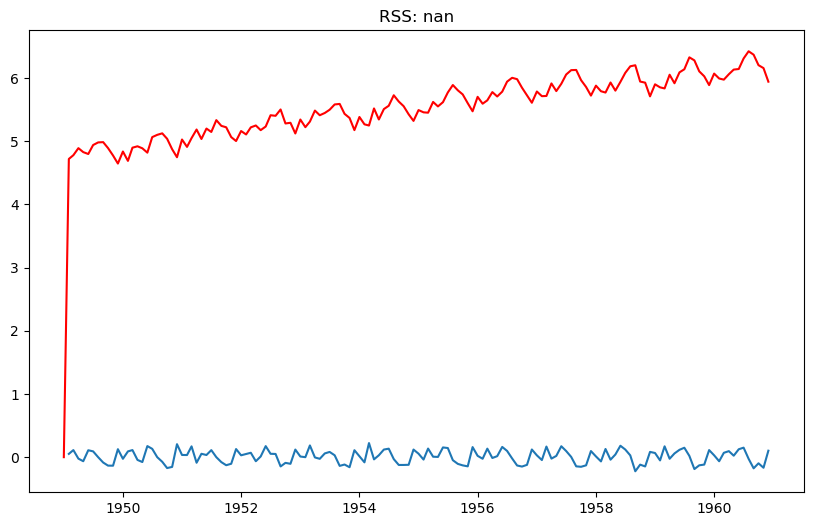

In [27]:
#MA model 
model = ARIMA(indexedDataset_logScale,order=(0,1,2))
results_MA = model.fit()
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting['#Passengers'])**2))
print('Plotting MA Model')

### ARIMA Model: 

We will now fit ARIMA model. Ths can be done by putting value of p=2,d=1,q=2 in ARIMA model parameters.


C:\Users\5120a\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\5120a\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\5120a\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Plotting ARIMA Model


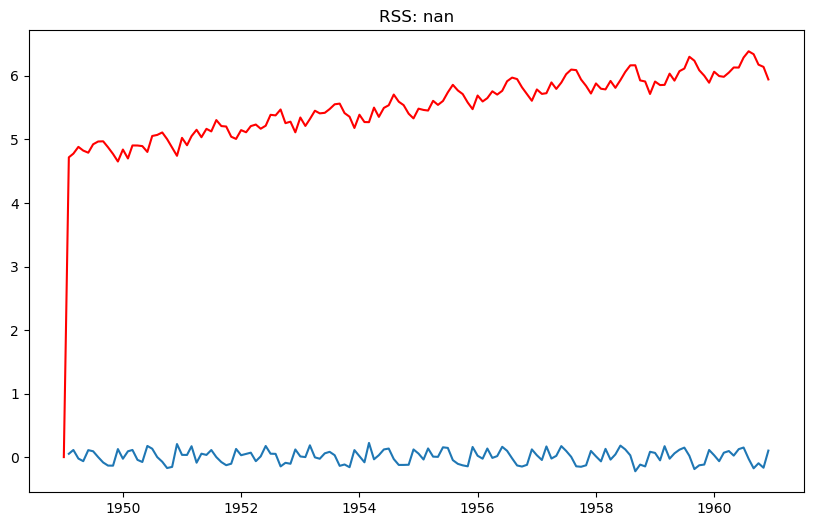

In [28]:
#ARIMA model 
model = ARIMA(indexedDataset_logScale,order=(2,1,2))
results_ARIMA = model.fit()
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['#Passengers'])**2))
print('Plotting ARIMA Model')

An ARIMA model is a model where the series of time was subtracted at least once in order to make it stationary, and we combine the Auto-Regressive (AR) and the Moving Average (MA) terms. Hence, we got the following equation:

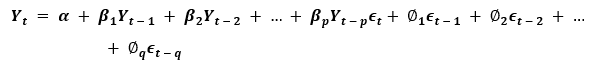

Here Y(t-1) represent the lag1 for Y(t).

ε(t-1) refers to error in the forecast of (t-1)th period. Similar to exponential smoothing.

In [29]:
print(results_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 128.890
Date:                Fri, 23 Jun 2023   AIC                           -247.780
Time:                        11:55:34   BIC                           -232.965
Sample:                    01-01-1949   HQIC                          -241.760
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2431      0.166      1.469      0.142      -0.081       0.568
ar.L2          0.2677      0.199      1.344      0.179      -0.123       0.658
ma.L1         -0.0867      0.118     -0.732      0.4

The coefficients are statistically significant.

ARIMA Model function for prediction:


Y(t) = 0.0096 + 1.6293 * Y(t-1)-0.8946 * Y(t-2) -1.8270 * ε(t-1) + 0.9245 * ε(t-2) 

In [30]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-01-01    0.000000
1949-02-01    4.718499
1949-03-01    4.776385
1949-04-01    4.883215
1949-05-01    4.824422
dtype: float64


Since we have differenced the data by order 1 initially to dtrend and remove stationarity. So, now we will remove the difference by taking cumulative sum inorder to get original values. Remember that row 1 of data is not there since it will not have anything to difference.

In [31]:
#Convert it into cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-01-01     0.000000
1949-02-01     4.718499
1949-03-01     9.494884
1949-04-01    14.378099
1949-05-01    19.202521
dtype: float64


Now, we will add the row 1 log value(4.718499) to the cumsum data in order to get predicted values of our model in log scale. Originally the cumsum was done to remove the difference of 1 which we did originally to detrend. But that did not include row 1 data original value (4.718499). So, now we will add this value for getting our final predictions in log Scale.

In [32]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['#Passengers'].iloc[0],index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head() 

Month
1949-01-01     4.718499
1949-02-01     9.436998
1949-03-01    14.213383
1949-04-01    19.096598
1949-05-01    23.921020
dtype: float64

Now we will take exponential of the values in log Scale in order to get the predicted number of passengers in original terms. (indexedDataset)

In [33]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)
plt.title("Actual Curve v/s Predicted Curve")

C:\Users\5120a\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Actual Curve v/s Predicted Curve')

C:\Users\5120a\anaconda3\lib\site-packages\matplotlib\ticker.py:2073: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale
C:\Users\5120a\anaconda3\lib\site-packages\matplotlib\ticker.py:2106: RuntimeWarning: overflow encountered in multiply
  ticks = np.arange(low, high + 1) * step + best_vmin


OverflowError: cannot convert float infinity to integer

<Figure size 1000x600 with 1 Axes>

We can observe that the magnitude is varying but the shape or trend has been captured very nicely by our predicted curve.

In [34]:
indexedDataset_logScale

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [35]:
results_ARIMA.plot_predict(1,264,dynamic=False)

AttributeError: 'ARIMAResults' object has no attribute 'plot_predict'

In [ ]:
fc = results_ARIMA.forecast(120, alpha=0.05)